In [1]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15900, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 15900 (delta 18), reused 13 (delta 5), pack-reused 15863 (from 3)
Receiving objects: 100% (15900/15900), 14.48 MiB | 7.86 MiB/s, done.
Resolving deltas: 100% (10701/10701), done.


In [2]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [3]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


In [4]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: wa

In [5]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file
def download(path):
  from google.colab import files
  files.download(path)

In [6]:
# mount drive to access cfg, dataset, .data, .classes, train.py, and val.py
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [7]:
# cd back into the darknet folder to run detections
%cd darknet

/content/darknet


In [8]:
# unzip dataset

!unzip /content/gdrive/MyDrive/sbu.zip -d data/

Streaming output truncated to the last 5000 lines.
  inflating: data/images/train/1991.txt  
  inflating: data/images/train/1992.jpg  
  inflating: data/images/train/1992.txt  
  inflating: data/images/train/1993.jpg  
  inflating: data/images/train/1993.txt  
  inflating: data/images/train/1994.jpg  
  inflating: data/images/train/1994.txt  
  inflating: data/images/train/1995.jpg  
  inflating: data/images/train/1995.txt  
  inflating: data/images/train/1996.jpg  
  inflating: data/images/train/1996.txt  
  inflating: data/images/train/1997.jpg  
  inflating: data/images/train/1997.txt  
  inflating: data/images/train/1998.jpg  
  inflating: data/images/train/1998.txt  
  inflating: data/images/train/1999.jpg  
  inflating: data/images/train/1999.txt  
  inflating: data/images/train/2000.jpg  
  inflating: data/images/train/2000.txt  
  inflating: data/images/train/2001.jpg  
  inflating: data/images/train/2001.txt  
  inflating: data/images/train/2002.jpg  
  inflating: data/images/

In [9]:
# copy cfg from the drive to darknet

!cp /content/gdrive/MyDrive/tinyv4_empty.cfg ./cfg

In [10]:
# copy classes.names and data.data to darknet

!cp /content/gdrive/MyDrive/mask-augmentation.names ./data
!cp /content/gdrive/MyDrive/mask-augmentation.data ./data

In [11]:
# copy train.py and val.py

!cp /content/gdrive/MyDrive/generate_train.py ./
!cp /content/gdrive/MyDrive/generate_val.py ./

In [12]:
# create train.txt and val.txt in images folder in data under darknet

!python generate_train.py
!python generate_val.py

In [15]:
# train the model
!./darknet detector train data/mask-augmentation.data cfg/tinyv4_empty.cfg /content/gdrive/MyDrive/empty.weights -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 64513, rewritten_bbox = 0.023251 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 36 Avg (IOU: 0.000000), count: 1, class_loss = 0.010018, iou_loss = 0.000000, total_loss = 0.010018 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 43 Avg (IOU: 0.720642), count: 5, class_loss = 0.984831, iou_loss = 1.532738, total_loss = 2.517570 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 52 Avg (IOU: 0.765938), count: 1, class_loss = 0.275028, iou_loss = 1.554534, total_loss = 1.829562 
 total_bbox = 64519, rewritten_bbox = 0.023249 % 

 Tensor Cores are used.
3867/4000: loss=0.7 hours left=0.1
 3867: 0.700332, 0.669133 avg loss, 0.000026 rate, 0.945747 seconds, 123744 images, 0.088901 hours left
Loaded: 0.000109 seconds
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 36 Avg (IOU: 0.732898), count: 4, class_loss = 0.885734, iou_loss = 0.193396, total_loss

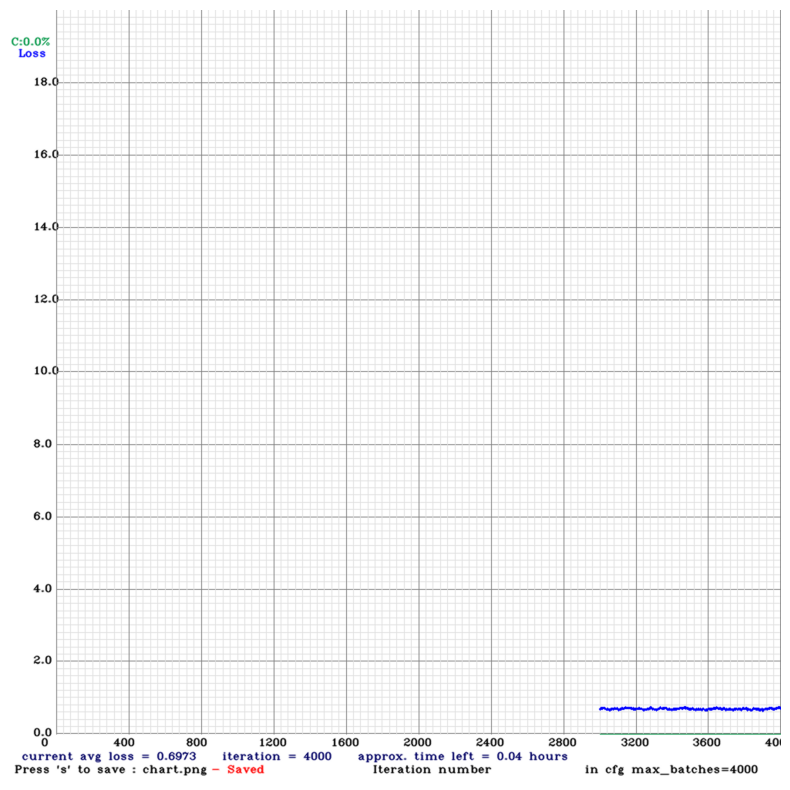

In [16]:
# show chart.png of how custom object detector did with training (loss curve)

imShow('chart.png')

In [17]:
# calculate map and ap for each class

!./darknet detector map data/mask-augmentation.data cfg/tinyv4_empty.cfg /content/gdrive/MyDrive/backup/tinyv4_empty_4000.weights

 CUDA-version: 12050 (12040)
, cuDNN: 9.2.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    608 x 608 x   3 ->  304 x 304 x  32 0.160 BF
   1 conv     64       3 x 3/ 2    304 x 304 x  32 ->  152 x 152 x  64 0.852 BF
   2 conv     64       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x  64 1.703 BF
   3 route  2 		                       1/2 ->  152 x 152 x  32 
   4 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   5 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   6 route  5 4 	                           ->  152 x 152 x  64 
   7 conv     64       1 x 1/ 1    152 x 152 x  64 ->  152 x 152 x  64 0.189 BF
   8 route  2 7 	    

In [18]:
# Testing the model

# need to set our custom cfg to test mode
%cd cfg
!sed -i 's/batch=32/batch=1/' tinyv4_empty.cfg
!sed -i 's/subdivisions=8/subdivisions=1/' tinyv4_empty.cfg
%cd ..

/content/darknet/cfg
/content/darknet


 CUDA-version: 12050 (12040)
, cuDNN: 9.2.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    608 x 608 x   3 ->  304 x 304 x  32 0.160 BF
   1 conv     64       3 x 3/ 2    304 x 304 x  32 ->  152 x 152 x  64 0.852 BF
   2 conv     64       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x  64 1.703 BF
   3 route  2 		                       1/2 ->  152 x 152 x  32 
   4 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   5 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   6 route  5 4 	                           ->  152 x 152 x  64 
   7 conv     64       1 x 1/ 1    152 x 152 x  64 ->  152 x 152 x  64 0.189 BF
   8 route  2 7 	    

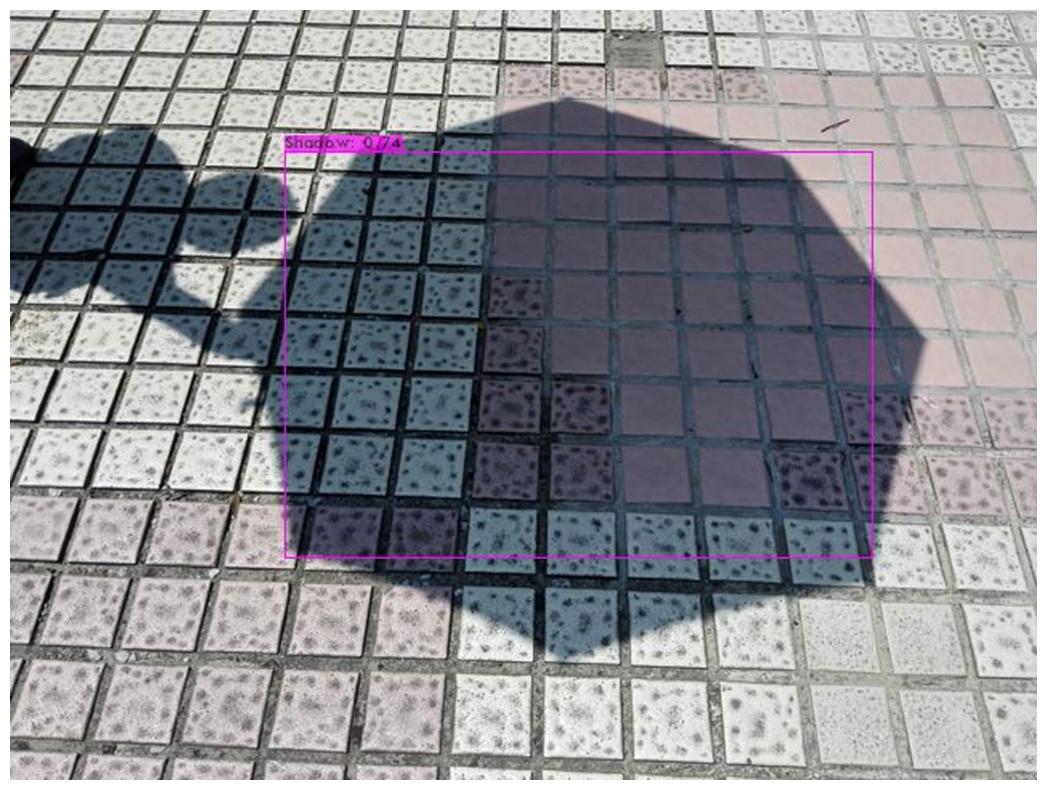

In [19]:
#detection on test image1

!./darknet detector test data/mask-augmentation.data cfg/tinyv4_empty.cfg /content/gdrive/MyDrive/backup/tinyv4_empty_4000.weights /content/gdrive/MyDrive/detection/0078.jpg -thresh 0.3
imShow('predictions.jpg')